# Explore Dataset

In [1]:
from sklearn.datasets import load_wine

dataset = load_wine()
list_of_best_accuracies=[]

for el in dataset:
    print(el)
    
print()
print(dataset['DESCR'])

data
target
target_names
DESCR
feature_names

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    

# Load dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing


df = pd.DataFrame(data=dataset['data'],columns=dataset['feature_names'])
df.insert(13,"label", load_wine()['target'], True)
df.head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Attributes selection and 2D representation

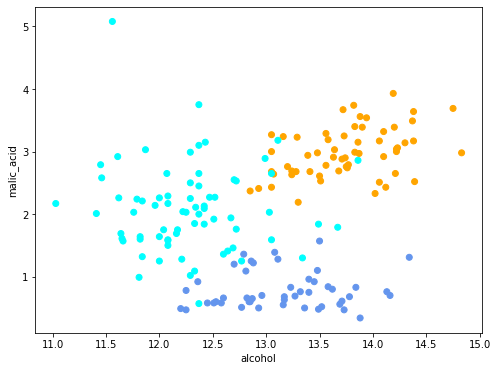

In [3]:
import matplotlib.pyplot as plt
import matplotlib

X=np.ones((178,2))
y=np.ones(178)
for el in range(178):                               # required for the extra point:
    X[el]=[df['alcohol'][el],df["malic_acid"][el]]  # X[el]=[df['alcohol'][el],df["flavanoids"][el]]
    y[el]=df['label'][el]
    
colors=[]
i=0
for el in df['label']:
    if el==0:
        colors.append('orange')
    elif el==1:
        colors.append('cyan')
    else:
        colors.append('cornflowerblue')
    i+=1
    
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X[:,0], X[:,1], color=colors)
plt.xlabel("alcohol")
plt.ylabel("malic_acid")
plt.show()



# Split data into train, validation and test

In [4]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.375, random_state=1)
print("%train:",len(X_train)/178,"  %val:",len(X_val)/178,"  %test:",len(X_test)/178)

%train: 0.4943820224719101   %val: 0.20224719101123595   %test: 0.30337078651685395


# k-nn

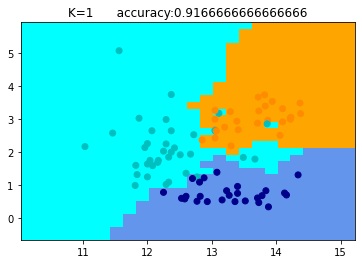

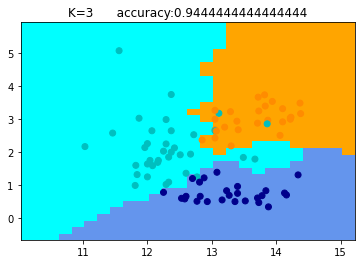

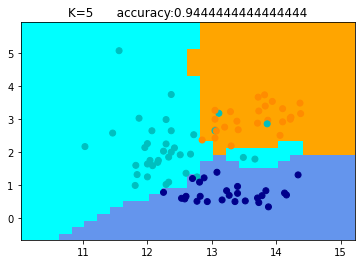

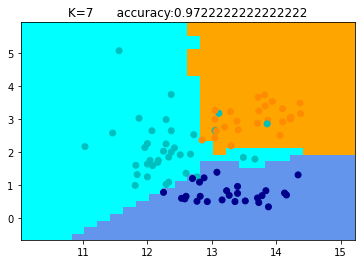

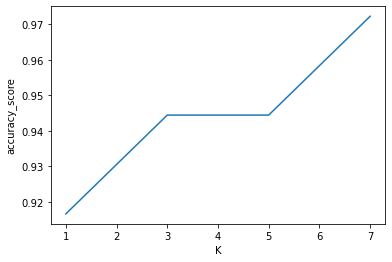

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

K=[1,3,5,7]
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])    
h=0.2
accuracy_list=[]
for el in K:
    knn=KNeighborsClassifier(n_neighbors=el, weights='distance')
    knn.fit(X_train, y_train)
    
    x_min, x_max = X_train[:, 0].min()-1 , X_train[:, 0].max()+1
    y_min, y_max = X_train[:, 1].min()-1 , X_train[:, 1].max()+1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))

    # predict class using data and kNN classifier
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    y_pred=knn.predict(X_val)
    accuracy_list.append(accuracy_score(y_val,y_pred))
    title="K="+str(el)+"      accuracy:"+str(accuracy_list[-1])
    plt.title(title)
    plt.show()
    
print()    
plt.plot(K,accuracy_list)
plt.ylabel('accuracy_score')
plt.xlabel('K')
plt.show()    

    

# Training of the best K-nn model

In [6]:
def take_best(A,B):
    MAX=B[0]
    index=0
    for i in range(len(B)):
        if B[i]>=MAX:
            MAX=B[i]
            index=i
    return A[index]  

best_K=take_best(K,accuracy_list)
knn=KNeighborsClassifier(n_neighbors=best_K, weights='distance')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('K:',best_K,'    accuracy on test-set:',accuracy_score(y_test,y_pred))
list_of_best_accuracies.append(accuracy_score(y_test,y_pred))

K: 7     accuracy on test-set: 0.9259259259259259


# Linear SVM

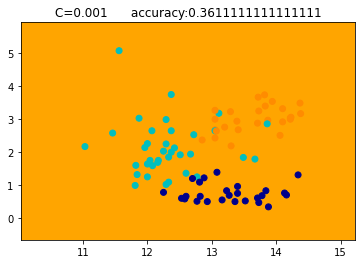

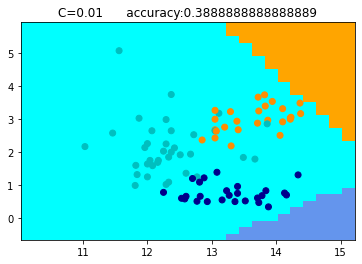

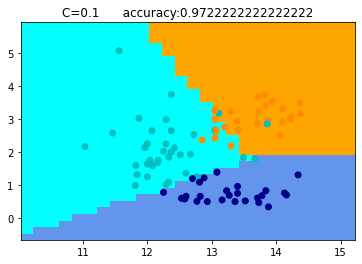

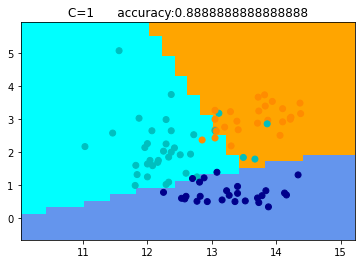

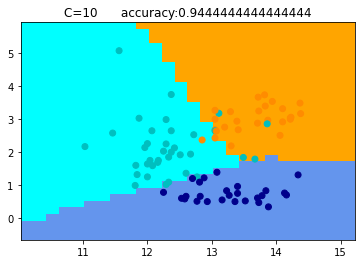

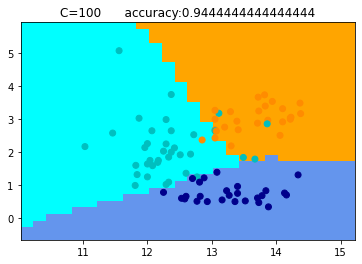

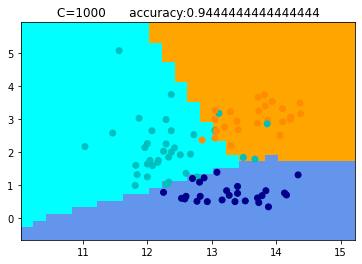

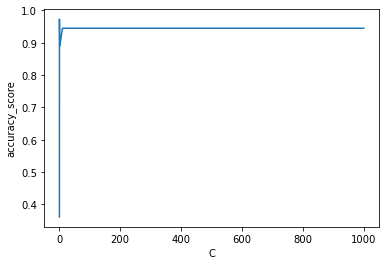

In [7]:
from sklearn import svm

C=[0.001,0.01,0.1,1,10,100,1000]
accuracy_list=[]
for el in C:
    linearSVM=svm.SVC(kernel='linear', C=el)
    linearSVM.fit(X_train,y_train)   
    
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    Z = linearSVM.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    y_pred=linearSVM.predict(X_val)
    accuracy_list.append(accuracy_score(y_val,y_pred))
    title="C="+str(el)+"      accuracy:"+str(accuracy_list[-1])
    plt.title(title)
    plt.show()

print()
plt.plot(C,accuracy_list)
plt.ylabel('accuracy_score')
plt.xlabel('C')
plt.show()    



# Training of the best linear-svm model

In [8]:
best_C=take_best(C,accuracy_list)
linearSVM=svm.SVC(kernel='linear',C=best_C)
linearSVM.fit(X_train,y_train)
y_pred=linearSVM.predict(X_test)
print('C:',best_C,'    accuracy on test-set:',accuracy_score(y_test,y_pred))
list_of_best_accuracies.append(accuracy_score(y_test,y_pred))

C: 0.1     accuracy on test-set: 0.9444444444444444


# RBF kernel

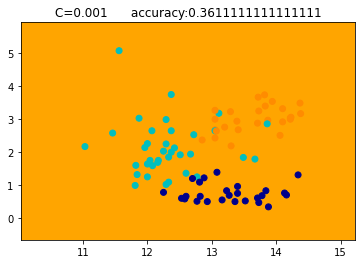

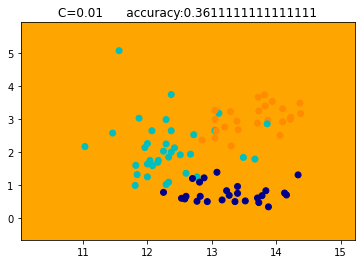

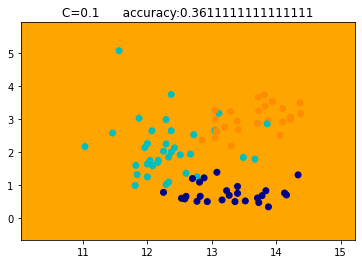

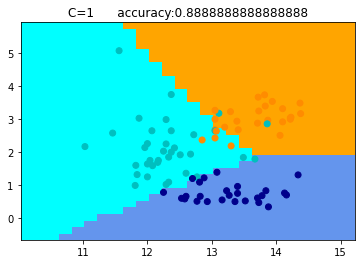

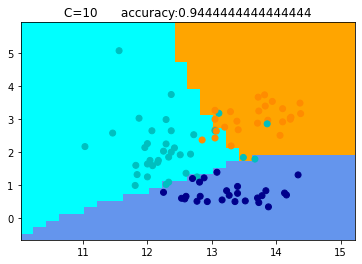

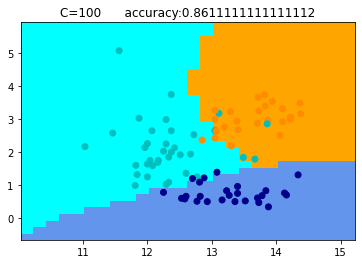

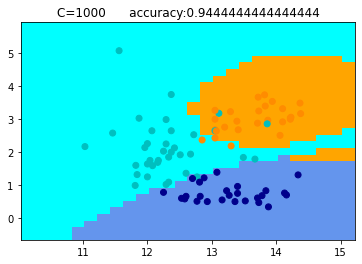

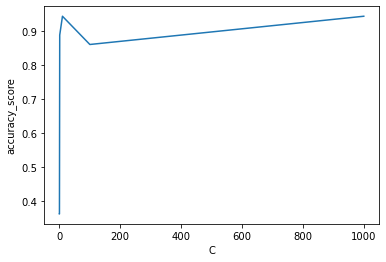

In [9]:

accuracy_list=[]
for el in C:
    model=svm.SVC(kernel='rbf',C=el)
    model.fit(X_train,y_train)
    
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    y_pred=model.predict(X_val)
    accuracy_list.append(accuracy_score(y_val,y_pred))
    title="C="+str(el)+"      accuracy:"+str(accuracy_list[-1])
    plt.title(title)
    plt.show()
    
print()
plt.plot(C,accuracy_list)
plt.ylabel('accuracy_score')
plt.xlabel('C')
plt.show()     

# Training of the best model

In [10]:

best_C=take_best(C,accuracy_list)
model=svm.SVC(kernel='rbf',C=best_C)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('C:',best_C,'    accuracy on test-set:',accuracy_score(y_pred,y_test))
list_of_best_accuracies.append(accuracy_score(y_test,y_pred))

C: 1000     accuracy on test-set: 0.9444444444444444


# Grid search 

best parameters: [ C= 1 , gamma= 1 ]    accuracy on validation-set: 0.9722222222222222

accuracy on test-set: 0.9444444444444444


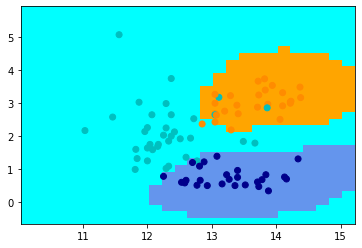

In [11]:

def grid_search(list1, list2, X_t, y_t, X_v, y_v):
    max_accuracy=0
    best_params_=[list1[0],list2[0]]
    for c in list1:
        for gamma in list2:
            model=svm.SVC(kernel='rbf',C=c,gamma=gamma)
            model.fit(X_t,y_t)
            y_pred=model.predict(X_v)
            accuracy=accuracy_score(y_v,y_pred)
            if accuracy>max_accuracy:
                max_accuracy=accuracy
                best_model=model
                best_params_=[c,gamma]
                best_accuracy=max_accuracy
    return best_model,best_params_,best_accuracy

gamma=[1, 0.1, 0.01, 0.001]
best_model,best_params_,acc=grid_search(C, gamma, X_train, y_train, X_val, y_val)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

y_pred=best_model.predict(X_val)
print('best parameters: [ C=',best_params_[0],', gamma=',best_params_[1],']    accuracy on validation-set:',accuracy_score(y_pred,y_val))
y_pred=best_model.predict(X_test)
print()
print('accuracy on test-set:',accuracy_score(y_pred,y_test))
list_of_best_accuracies.append(accuracy_score(y_test,y_pred))

# K-fold

In [12]:
from sklearn.model_selection import KFold
                                   
X_train=np.concatenate((X_train,X_val),axis=0)
y_train=np.concatenate((y_train,y_val),axis=None)
print('%train:',len(X_train)/178,'    %test',len(X_test)/178)
                                   
kf= KFold(n_splits=5, shuffle=True)
                                   
model=svm.SVC()                    
max_accuracy=0                     
for train_index, val_index in kf.split(X_train):
    X_train_k, X_val_k = X_train[train_index], X_train[val_index]
    y_train_k, y_val_k = y_train[train_index], y_train[val_index]
    model,best_params_,accuracy=grid_search(C,gamma,X_train,y_train,X_test,y_test)
    if accuracy>=max_accuracy:     
        best_model=model           
        max_accuracy=accuracy      
                                   
print('best parameters: [ C=',best_params_[0],', gamma=',best_params_[1],']    accuracy on the test-set:',max_accuracy)       
list_of_best_accuracies.append(max_accuracy)
                                     
                                   

%train: 0.6966292134831461     %test 0.30337078651685395
best parameters: [ C= 10 , gamma= 0.1 ]    accuracy on the test-set: 0.9629629629629629


# Conclusions

In [13]:

conclusion = pd.DataFrame(data=list_of_best_accuracies,columns=["accuracy on test-set"],index=["k-nn","svm","rbf kernel","grid-search","k-fold"])
conclusion.head()

,accuracy on test-set
k-nn,0.925926
svm,0.944444
rbf kernel,0.944444
grid-search,0.944444
k-fold,0.962963


# extra point 

alcohol


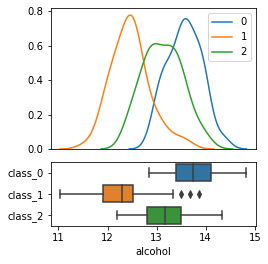

malic_acid


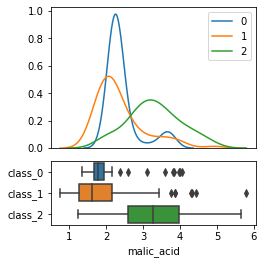

ash


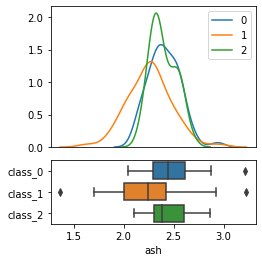

alcalinity_of_ash


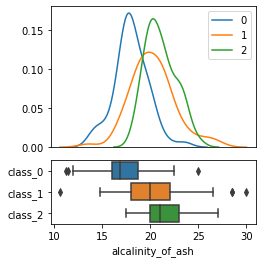

magnesium


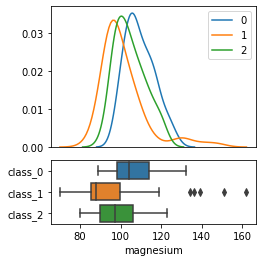

total_phenols


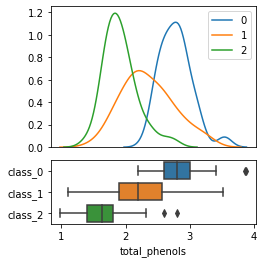

flavanoids


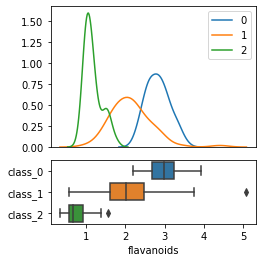

nonflavanoid_phenols


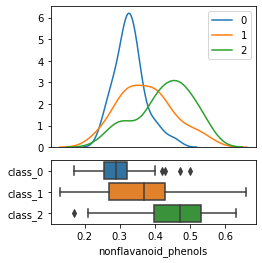

proanthocyanins


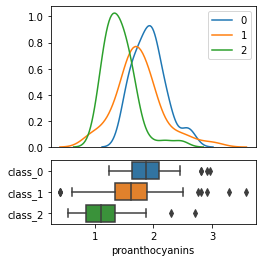

color_intensity


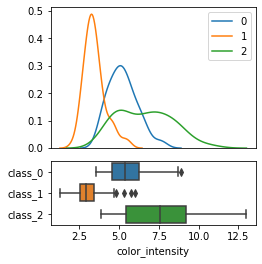

hue


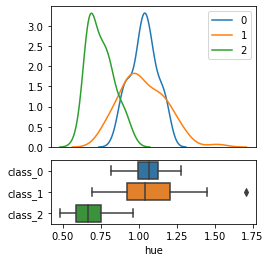

od280/od315_of_diluted_wines


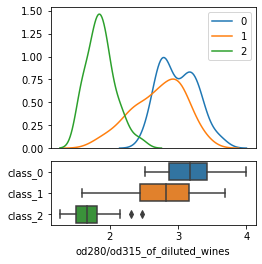

proline


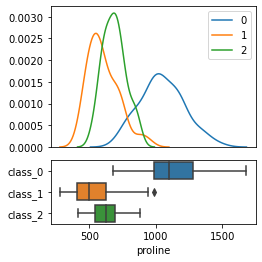

In [14]:
import matplotlib.gridspec as gridspec
import seaborn as sns


raw_data = load_wine()
raw_data

features = pd.DataFrame(data=raw_data['data'],columns=raw_data['feature_names'])
data = features
data['target']=raw_data['target']
data['class']=data['target'].map(lambda ind: raw_data['target_names'][ind])



for feature in raw_data['feature_names']:
    print(feature)
    #sns.boxplot(data=data,x=data.target,y=data[feature])
    gs1 = gridspec.GridSpec(3,1)
    ax1 = plt.subplot(gs1[:-1])
    ax2 = plt.subplot(gs1[-1])
    gs1.update(right=0.60)
    sns.boxplot(x=feature,y='class',data=data,ax=ax2)
    sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
    sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
    sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
    ax2.yaxis.label.set_visible(False)
    ax1.xaxis.set_visible(False)
    plt.show()